In [13]:
%%HTML
<style>
    body {
        /* Change markdown to the superior font style */
        --vscode-font-family: "Courier"
    }
</style>

In [14]:
# Import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.preprocessing import StandardScaler

### Step 1: Data Processing

Read data from a csv file and convert that into a dataframe, which will allow for all further
analysis and data manipulation.

Package(s) required: Pandas

In [15]:
# Import the data
file_name = "Project_1_Data.csv"

# Access the data
df = pd.read_csv(f"../data/{file_name}")

# Check if there are empty values
print(f"Empty values\n{df.isnull().any()}\n")

# View df info and first few rows
print(df.info())
print(df.head())

Empty values
X       False
Y       False
Z       False
Step    False
dtype: bool

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 860 entries, 0 to 859
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   X       860 non-null    float64
 1   Y       860 non-null    float64
 2   Z       860 non-null    float64
 3   Step    860 non-null    int64  
dtypes: float64(3), int64(1)
memory usage: 27.0 KB
None
       X       Y     Z  Step
0  9.375  3.0625  0.50     1
1  9.375  3.0625  0.51     1
2  9.375  3.0625  0.52     1
3  9.375  3.0625  0.53     1
4  9.375  3.0625  0.54     1


### Step 2: Data Visualization

Perform statistical analysis on the dataset and visualize the dataset behaviour within each
class. This will provide an initial understanding of the raw data behaviour. You are required
to include the plots and explain the findings.

Package(s) required: Matplotlib, Pandas, Numpy

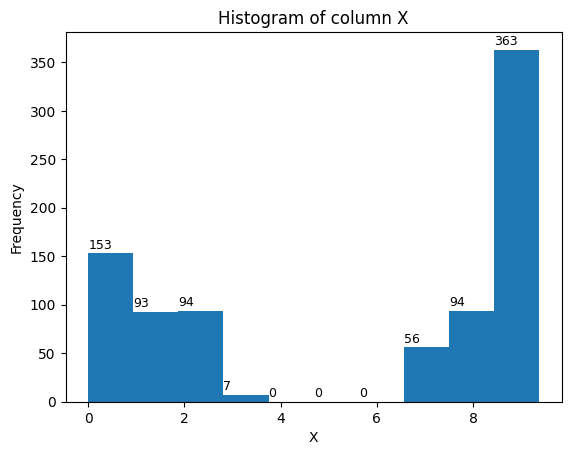

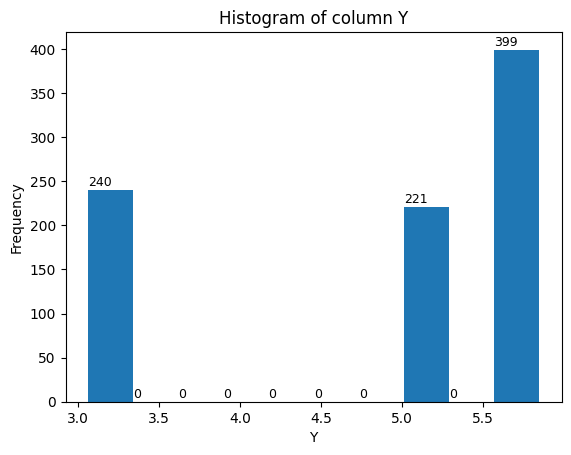

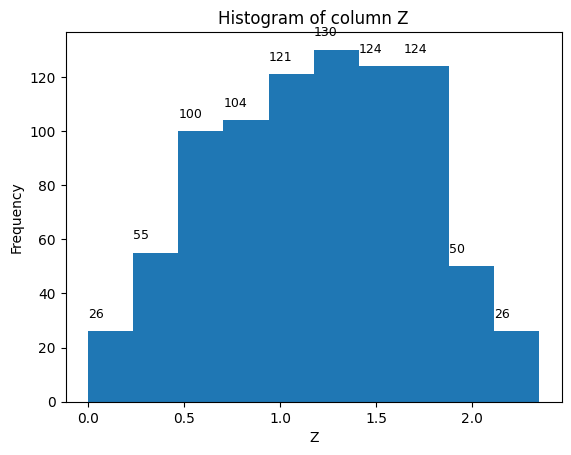

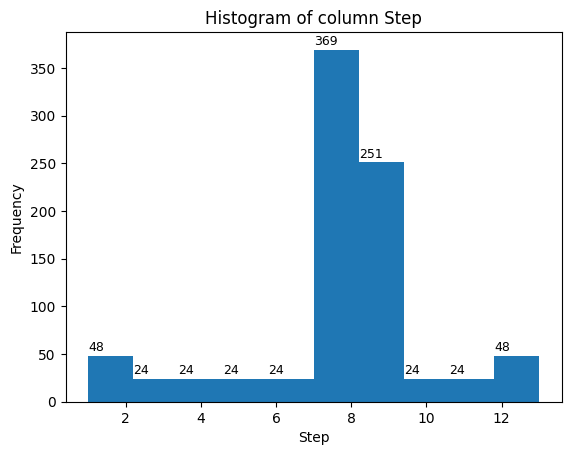

In [16]:
# Creating histograms of each column entry
for col in df.columns:
    plt.figure()  # Create a new figure each time so they don't overlap
    counts, bins, patches = plt.hist(df[col], bins=10)
    plt.title(f'Histogram of column {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')

    # Add number of occurences to each histogram bar
    for count, x in zip(counts, bins):
        plt.text(x, count + 5, str(int(count)), fontsize=9)

    plt.show()

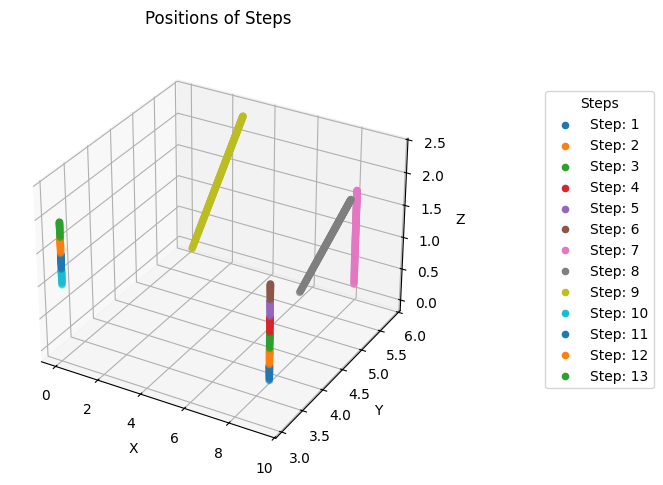

In [17]:
# Create a 3D plot of points with colour coding for each step
fig = plt.figure()
fig.suptitle("Positions of Steps")

# Create a 3d axis
ax = fig.add_subplot(projection="3d")
ax.set_xlabel("X")
ax.set_ylabel("Y")
ax.set_zlabel("Z")

# Get unique values in Step column (will be used for colour coding)
unique_vals = df["Step"].unique()

# Iterate over each unique value
for i, val in enumerate(unique_vals):
    temp_df = df[
        df["Step"] == val
    ]  # Create new df where Step is equal to current selected step
    ax.scatter(
        temp_df["X"], temp_df["Y"], temp_df["Z"], marker="o", label=f"Step: {val}"
    )

# Place legend outside of the plot
fig.legend(loc="center left", bbox_to_anchor=(1, 0.5), title="Steps")
plt.tight_layout()
plt.show()

### Step 3: Correlation Analysis

Assess the correlation of the features with the target variable. A correlation study provides
an understanding of how the features impact the target variable. A common correlation
method used is Pearson Correlation. You are required to include the correlation plot, and
explain the correlation between the features and the target variables, along with the impact
it could have on your predictions.

Package(s) required: Seaborn, Pandas

             X         Y         Z      Step
X     1.000000  0.140759  0.013870  0.749911
Y     0.140759  1.000000  0.133676  0.292810
Z     0.013870  0.133676  1.000000  0.199531
Step  0.749911  0.292810  0.199531  1.000000


<Axes: >

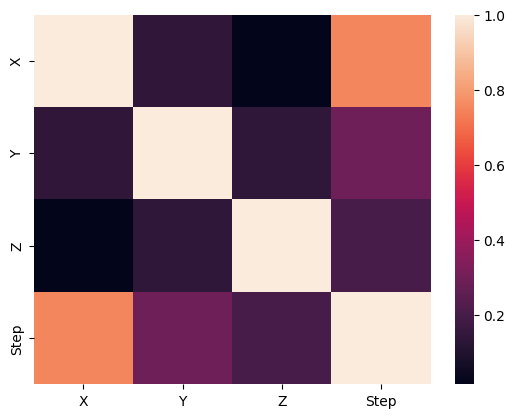

In [18]:
# Get correlation matrix
corr_matrix = df.corr()
print(abs(corr_matrix))

# Display the absolute value of the corr matrix
# Keeping "Step" incase features need to be dropped, we shall use the correlation wrt to "Step" to determine which to drop.
sns.heatmap(np.abs(corr_matrix))

Based on the correlation matrix, there appear to be no strong correlations between any of the features, thus, there is no reason to drop any of the features.

<Axes: >

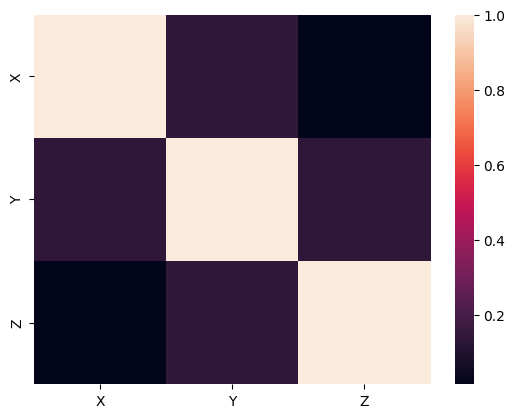

In [19]:
# Show the correlation matrix without the output variable "Step"
corr_matrix = df.drop(columns=['Step']).corr()
sns.heatmap(np.abs(corr_matrix))

### Step 4: Classification Model Development/Engineering

Prepare the data to create three classification models (based on ML algorithms). The dataset
needs to be split into training and testing categories to develop the models. For each ML
model, utilize grid search cross-validation to assess the hyperparameters that give you the
best results. You are required to explain your selected choice of classification algorithms.
In addition to the tree classification models with grid search cross-validation, you must
make one model based on using RandomizedSearchCV. this will provide another method of
determining the best hyperparameters to optimize your results.

Package(s) required: scikit-learn - All ML models can be accessed from the sklearn package

In [21]:
my_splitter = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)

# Split the data into train and test using "Step" for stratification
for train_index, test_index in my_splitter.split(df, df["Step"]):
    strat_df_train = df.loc[train_index].reset_index(drop=True)
    strat_df_test = df.loc[test_index].reset_index(drop=True)

# Training data
X_train = strat_df_train.drop(columns=["Step"])
y_train = strat_df_train["Step"]

# Testing data
X_test = strat_df_test.drop(columns=["Step"])
y_test = strat_df_test["Step"]

# Scaling
scaler = StandardScaler()
scaler.fit(X_train)
X_train = pd.DataFrame(scaler.transform(X_train), columns=X_train.columns)
X_test = pd.DataFrame(scaler.transform(X_test), columns=X_test.columns)

KeyboardInterrupt: 